In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()
data = pd.read_csv('H3.txt', sep = '\n')
print(data.head())

Saving H3.txt to H3.txt
                                            all_data
0                                     >iTELL-Chr1_61
1  CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...
2                                                  0
3                                   >iYAL067W-A_5085
4  AATTTTTATAGGTCGACCCTTCTGTCGCTTACTGGGTTGATTATCT...


In [43]:
all=data["all_data"].tolist()
cls=[]
sequence=[]
label=[]

In [44]:
length = len(all)
for i in range(length):
   if (i%3)==0:
             cls.append(all[i])
   else:
      if(all[i]== "0" or all[i]=="1"):
        label.append(all[i])
      else:
         sequence.append(all[i])

print(len(cls))
print(len(label))
print(len(sequence))

14965
14965
14965


In [45]:
df = pd.DataFrame(list(zip(cls, label, sequence)),
               columns =['class' , 'label', 'sequence'])
df.head(10)

,class,label,sequence
0,>iTELL-Chr1_61,0,CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...
1,>iYAL067W-A_5085,0,AATTTTTATAGGTCGACCCTTCTGTCGCTTACTGGGTTGATTATCT...
2,>iYAL067W-A_6786,0,AATTATATTTCCATCAGCTCAATACCGCAGTACTTTGAAACCTGAT...
3,>iYAL067W-A_7060,0,AACAATAGTGGGTATGAGTAAAGATATATAGATCGATATTTTGAAT...
4,>YAL067C_SEO1_8061,1,CAAAGATTTCAACCATAGTAGGTATGCCCCAGATGAAACATTACTG...
5,>YAL067C_SEO1_8340,1,CACAATAGCGTCAATAATAAAGTTCCATCTCCATCCCTCTAAACCA...
6,>iYAL067C_9509,1,GTTTTTTTCCAGTGACACAATCTTTACCATTACACAGTTTTTACTA...
7,>iYAL067C_10442,0,CAGAAACATAAAATTATATCACTTTATTTCATATGGTTTCATGCTT...
8,>YAL065C_YAL065C_11570,1,AGATACCTCGAAACAAACTCTATGTAAACACTTATTTTATTGTGGT...
9,>iYAL064W-B_13286,1,ATGACTGGAGAAGAAGTGACTAGAGAAGAAGTGACTGAGGAAGAAA...


In [46]:

sequences=df['sequence']
sequences


0        CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...
1        AATTTTTATAGGTCGACCCTTCTGTCGCTTACTGGGTTGATTATCT...
2        AATTATATTTCCATCAGCTCAATACCGCAGTACTTTGAAACCTGAT...
3        AACAATAGTGGGTATGAGTAAAGATATATAGATCGATATTTTGAAT...
4        CAAAGATTTCAACCATAGTAGGTATGCCCCAGATGAAACATTACTG...
                               ...                        
14960    TCATAATTACAAAATACCCTGTGATTAGGATATCATTATTACTAAC...
14961    ATATGTTTACAACAAAGTTATAAAAAGTTTTCTCAAACCTTTTCCA...
14962    ATTATATTTAATTTAATAAGAAAAGAAACGAAAAAAAAAAAAAAAA...
14963    TATAAATGAATGCTCTCGTTGTAATTCAAGAGAACCCAACCAACAA...
14964    TTGATGTTGCCATTTACTATAATTCTCTCCATAATCATTGCAGTAA...
Name: sequence, Length: 14965, dtype: object

In [47]:
max_len = 502
for seq in sequences:
        length = len(seq)
        if length >max_len:
           max_len=length

In [48]:

padded_seqs = []

for seq in sequence:
        gap=" "
        gap=[0] * (max_len - len(seq))
        gap= ''.join(map(str, gap))
        gap=seq+gap;
        padded_seqs.append(gap)

In [49]:
len(padded_seqs[2])

502

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

integer_encoder = LabelEncoder()  
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in padded_seqs:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CACACCACAC ... GTTCTTCTAC
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
input_features

array([[[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       ...,

       [[0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0.,

In [52]:
labels=df['label']
labels

0        0
1        0
2        0
3        0
4        1
        ..
14960    0
14961    1
14962    1
14963    1
14964    1
Name: label, Length: 14965, dtype: object

In [53]:
one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)


Labels:
 [['0' '0' '0' ... '1' '1' '1']]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [54]:
input_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [55]:
import numpy as np
input_features=np.asarray(input_features)
input_labels=np.asarray(input_labels)


In [56]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.25, random_state=42)

In [73]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=5, kernel_size=5, 
                 input_shape=(train_features.shape[1], 5)))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 498, 5)            130       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 24, 5)             0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              123904    
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)             

Epoch 1/15
527/527 - 7s - loss: 0.6479 - binary_accuracy: 0.6058 - val_loss: 0.5163 - val_binary_accuracy: 0.7545
Epoch 2/15
527/527 - 6s - loss: 0.5225 - binary_accuracy: 0.7589 - val_loss: 0.4859 - val_binary_accuracy: 0.7666
Epoch 3/15
527/527 - 6s - loss: 0.4764 - binary_accuracy: 0.7818 - val_loss: 0.4814 - val_binary_accuracy: 0.7630
Epoch 4/15
527/527 - 6s - loss: 0.4387 - binary_accuracy: 0.8081 - val_loss: 0.4990 - val_binary_accuracy: 0.7762
Epoch 5/15
527/527 - 6s - loss: 0.4062 - binary_accuracy: 0.8258 - val_loss: 0.4683 - val_binary_accuracy: 0.7819
Epoch 6/15
527/527 - 6s - loss: 0.3663 - binary_accuracy: 0.8458 - val_loss: 0.4897 - val_binary_accuracy: 0.7744
Epoch 7/15
527/527 - 6s - loss: 0.3240 - binary_accuracy: 0.8662 - val_loss: 0.4878 - val_binary_accuracy: 0.7798
Epoch 8/15
527/527 - 6s - loss: 0.2785 - binary_accuracy: 0.8865 - val_loss: 0.6197 - val_binary_accuracy: 0.7769
Epoch 9/15
527/527 - 6s - loss: 0.2446 - binary_accuracy: 0.9061 - val_loss: 0.6420 - va

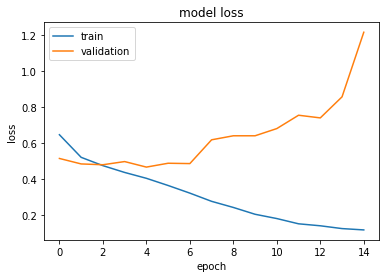

In [74]:
history = model.fit(train_features, train_labels, 
                    epochs=15, batch_size=16, verbose=2, validation_split=0.25)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

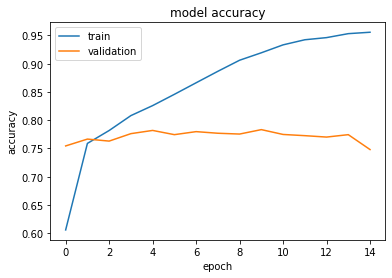

In [75]:
plt.figure()
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

Confusion matrix:
 [[1545  281]
 [ 661 1255]]


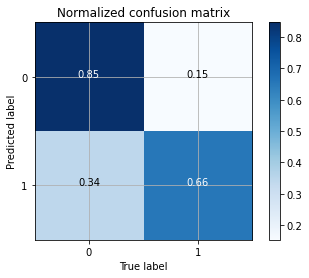

In [76]:
from sklearn.metrics import confusion_matrix
import itertools

predicted_labels = model.predict(np.stack(test_features))
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')